### Import libraries

In [9]:
import os
import numpy as np
import pandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1 from Tuesday class

In [11]:
# Import states data
fp = os.path.join('../','section-7','data','tl_2023_us_state','tl_2023_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower()
ca_boundary = states.loc[states["name"] == "California"]

In [14]:
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop first column
power_plants = power_plants.drop(columns='unnamed: 0')

# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )


ca_power_plants = power_plants[power_plants['state'] == 'California']
top_sources = ca_power_plants['primsource'].value_counts().head(3).index.tolist()
top_sources

['solar', 'natural gas', 'hydroelectric']

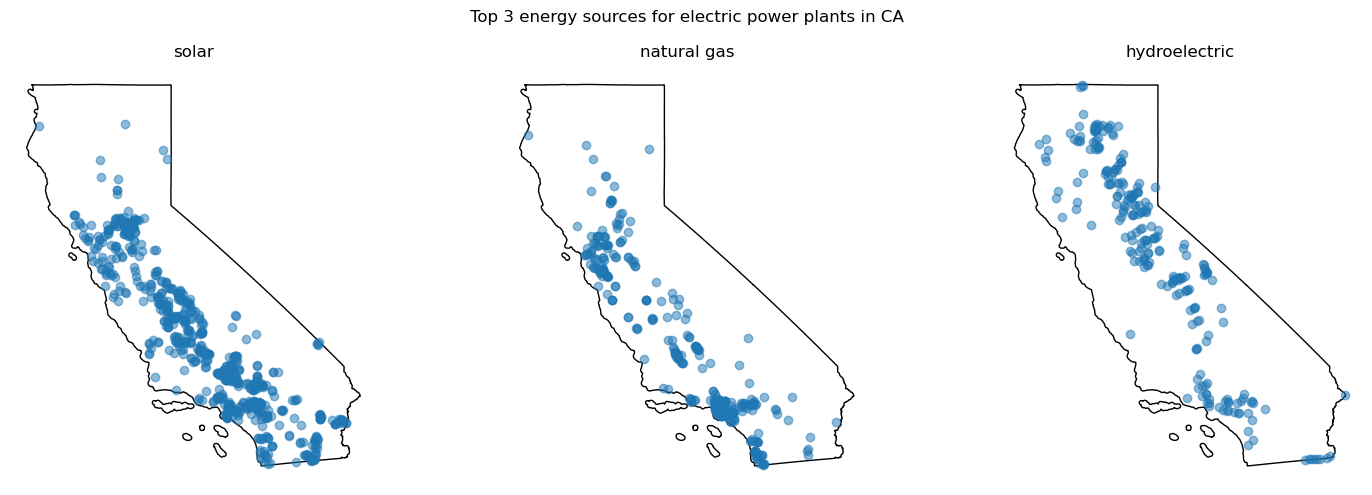

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle("Top 3 energy sources for electric power plants in CA")

for ax, source in zip(axes, top_sources):
    # Plot California boundary
    ca_boundary.plot(ax=ax,facecolor='none' , edgecolor = "black")
    
    # Filter and plot power plants for this source
    source_plants = ca_power_plants[ca_power_plants['primsource'] == source]
    source_plants.plot(ax=ax, alpha = 0.5)
    
    # Format the subplot
    ax.set_title(f'{source}', fontsize=12)
    ax.set_axis_off()
    
plt.tight_layout()
plt.show()

### Exercise #2 - Sofia

### Import arctic communities data

In [ ]:
fp = os.path.join('../../../../../courses/EDS220/data/arctic_communities.geojson')
df = gpd.read_file(fp)
df.plot()

### Check Geometry type - Henry

In [ ]:
#create a function named  check_polygons  that receives a single geodataframe as its parameter and prints out a message stating whether all the geometry types are polygons or not.


### Explode polygons - Hylaea

### Compute minimum y-coordinate for polygons - Kylie

### Filter and update CRS, reporduce map - Kylie